### 統計學習與深度學習 (Fall, 2025)
### Homework 1

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。
如無其他規定，所有重要結果應顯示至小數點第四位(四捨五入)。


### 第一題 [Ridge Regression Baseline]

(30%) 以Ridge Regression進行房價預測。盡可能使用scikit-learn的函數與numpy進行實作。Regularizaiton coefficient (alphas)應考慮介於0.01至100之間的數值，且至少應考慮十種可能的數值。

本題禁止使用'Auto-SKlearn'或其他'AutoML'工具。

訓練資料檔案為'housing_5cities_train.csv', 測試資料檔案為 'housing_5cities_testa.csv'。預測標的為'單價'。你的模型應包含以下特徵:
* 建物面積
* 總樓層數
* 屋齡
* 縣市
* 鄉鎮市區
* 主要用途
* 主要建材
* 建物型態

類別型特徵應進行適當的轉換。

(1) 畫出高雄市資料點的分布，橫坐標為x軸，縱坐標為y軸。依照單價將資料點上色。說明你對資料點個觀察。

(2) 列出最終選用的Regularization Coefficient，以下模型參數，並報告模型在測試資料的預測能力 (包含R2、RMSE、MAE、MAPE)。
* Constant term coefficient
* 建物面積
* 總樓層數
* 屋齡
* 台中市
* 台北市
* 新北市
* 桃園市
* 高雄市

(1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.family'] = 'Heiti TC'
pd.options.display.float_format = "{:.4f}".format

train_path = "housing_5cities_train.csv"
test_path = "housing_5cities_testa.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

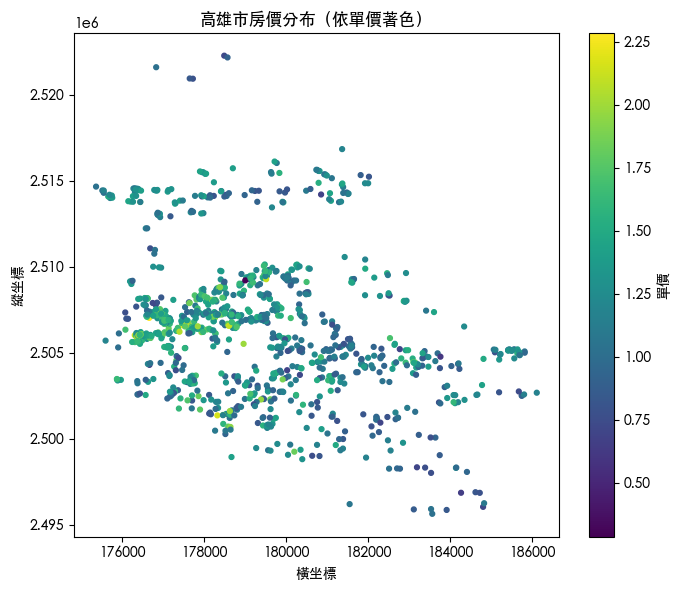

In [2]:
kao = df_train[df_train['縣市'] == '高雄市'].dropna(subset=['橫坐標', '縱坐標', '單價'])


plt.figure(figsize=(7, 6))
sc = plt.scatter(kao['橫坐標'], kao['縱坐標'],
                 c=kao['單價'], s=12, cmap='viridis')
plt.xlabel('橫坐標')
plt.ylabel('縱坐標')
plt.title('高雄市房價分布（依單價著色）')
plt.colorbar(sc, label='單價')
plt.tight_layout()
plt.show()

房價有些明顯集中的地區，越密集的地方通常會有較高的房價，而沒那麼密集的地方房價都相對偏低。這些高價點散布在核心區域附近，但不連續。

(2)

In [3]:
# evaluate function
def evaluate_and_report(name, model, X_train, X_test, y_train, y_test, topn_coef=20):
    # predict
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # dataframe
    coef_df = pd.DataFrame({
        "Feature": X_train.columns,
        "Coefficient": model.coef_
    }).reset_index(drop=True)

    # print(f"\n=== {name} ===")
    # print(f"Best alpha: {model.alpha_:.4f}")
    # print(f"R²   = {r2:.4f}")
    # print(f"RMSE = {rmse:.4f}")
    # print(f"MAE  = {mae:.4f}")
    # print(f"MAPE = {mape:.2f}%")
    # display(coef_df.head(topn_coef))

    # return dataframe
    result_df = pd.DataFrame([{
        "Model": name,
        "Best alpha": model.alpha_,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape
    }])
    return result_df, coef_df

In [4]:
# === Q1: Baseline (STRICT) ===
# Numeric (standardize), categorical (one-hot), RidgeCV with alphas logspace(-2,2,20)
num_features = ["建物面積", "總樓層數", "屋齡"]  # numeric features
cat_features = ["縣市", "鄉鎮市區", "主要用途", "主要建材", "建物型態"]  # categorical features

# Extract
X_train_num = df_train[num_features].copy()
X_test_num  = df_test[num_features].copy()
X_train_cat = df_train[cat_features].copy()
X_test_cat  = df_test[cat_features].copy()

y_train = df_train["單價"].copy()
y_test  = df_test["單價"].copy()

# Standardize numeric
scaler_q1 = StandardScaler()
X_train_num_std = pd.DataFrame(
    scaler_q1.fit_transform(X_train_num),
    columns=num_features, index=df_train.index
)
X_test_num_std = pd.DataFrame(
    scaler_q1.transform(X_test_num),
    columns=num_features, index=df_test.index
)

# One-hot categories
# （保持與你 baseline 一致：不丟 baseline；如需避免 dummy trap，可改 drop_first=True）
X_train_cat_oh = pd.get_dummies(X_train_cat, drop_first=False)
X_test_cat_oh  = pd.get_dummies(X_test_cat, drop_first=False)
X_train_cat_oh, X_test_cat_oh = X_train_cat_oh.align(X_test_cat_oh, join="left", axis=1, fill_value=0)

# Combine
X_train_q1 = pd.concat([X_train_num_std, X_train_cat_oh], axis=1)
X_test_q1  = pd.concat([X_test_num_std,  X_test_cat_oh],  axis=1)

# RidgeCV
alphas = np.logspace(-2, 2, 20)
model_q1 = RidgeCV(alphas=alphas)
model_q1.fit(X_train_q1, y_train)

res_q1, coef_q1 = evaluate_and_report("Q1 Baseline", model_q1, X_train_q1, X_test_q1, y_train, y_test)
display(res_q1)
display(coef_q1.head(8))

,Model,Best alpha,R2,RMSE,MAE,MAPE
0,Q1 Baseline,0.7848,0.7681,0.5043,0.2817,13.2865


,Feature,Coefficient
0,建物面積,0.0026
1,總樓層數,0.0331
2,屋齡,-0.3114
3,縣市_台中市,-0.4523
4,縣市_台北市,1.6375
5,縣市_新北市,0.0429
6,縣市_桃園市,-0.6236
7,縣市_高雄市,-0.6045


### 第二題 [Gaussian Basis Function]

(35%) Gaussian Basis Function (GBF) 常用來擴展特徵。在房價預測中，我們可以挑選某些位置作為GBF的均數，並設定合理的變異數，即可利用GBF識別某筆資料是否為在選定的位置附近。

我們在課程中定義過一維情境下計算GBF特徵值的公式為:

$exp(- \frac{(x_a - \mu_j)^2}{2 s_j^2}), $

其中 $x_a$ 為資料點，而 $mu_j$  是選定的錨點 (Anchor)，標準差$s_j$ 是用來控管要訂多寬的區域。

房價資料的位置資訊為二維空間，因此如果資料點的位置是 $(x_a, y_a)$, 錨點是 $(\mu_{xj}, \mu_{yj})$、標準差是 $(s_{xj}, s_{yj})$，那GBF特徵值為:

$exp(- \frac{(x_a - \mu_{xj})^2}{2 s_{xj}^2} - \frac{(y_a - \mu_{yj})^2}{2 s_{yj}^2} )$

(1) 

這題我們只選擇一個錨點，定義為所有高雄市訓練資料的橫、縱座標平均值。橫軸的標準差取為高雄市訓練資料的 X 座標標準差，縱軸則取為 Y 座標的標準差。利用上面的公式計算 GBF 特徵值。請列出該錨點的座標與標準差，並為所有訓練資料計算 GBF 特徵值，依照縣市輸出描述統計（count, mean, std, min, 25%, 50%, 75%, max）。

(2) 

依照以下方式產生多個錨點，並使用 GBF 生成新的特徵，與 Q1 的所有特徵合併後，建構新的 Ridge Regression 預測模型，並計算其在測試資料上的預測能力（包含 R²、RMSE、MAE、MAPE）。

Regularizaiton coefficient (alphas)應考慮介於 0.01 至 100 之間的數值，且至少應考慮十種可能的數值。對每個城市 C，找出能包含所有資料點的邊界矩形，並將橫軸與縱軸各切成 $K$ 等分，形成 $K^2$ 個格子。若一個格子內有不少於 20 筆資料，則計算該格子內所有資料點的橫、縱座標平均值作為中心點，橫、縱座標的標準差作為尺度，定義為一個錨點；若一個格子內的資料點少於 20，則忽略該格子。請列出各縣市所產生的錨點。設 $K$ = 3，請計算模型在測試資料上的 R²、RMSE、MAE、MAPE，並與 Q1 baseline 結果比較。



(1)

In [5]:
kaohsiung = df_train[df_train['縣市'] == '高雄市']

mu_x = np.mean(kaohsiung['橫坐標'])
mu_y = np.mean(kaohsiung['縱坐標'])
std_x = np.std(kaohsiung['橫坐標'])
std_y = np.std(kaohsiung['縱坐標'])

print("高雄錨點中心：")
print(f"mu_x = {mu_x:.4f}, mu_y = {mu_y:.4f}")
print("高雄標準差：")
print(f"std_x = {std_x:.4f}, std_y = {std_y:.4f}")

高雄錨點中心：
mu_x = 179372.9859, mu_y = 2506459.4171
高雄標準差：
std_x = 2313.7378, std_y = 4031.4941


In [6]:
# gbf function
def gbf(x, y, mu_x, mu_y, std_x, std_y):
    return np.exp(-((x - mu_x)**2) / (2 * std_x**2) - ((y - mu_y)**2) / (2 * std_y**2))

df_train["GBF_高雄中心"] = gbf(df_train["橫坐標"], df_train["縱坐標"], mu_x, mu_y, std_x, std_y)

group_stats = df_train.groupby("縣市")["GBF_高雄中心"].describe()
print("各縣市 GBF 特徵值統計：")
display(group_stats)
df_train = df_train.drop(columns=["GBF_高雄中心"])

各縣市 GBF 特徵值統計：


,count,mean,std,min,25%,50%,75%,max
縣市,,,,,,,,
台中市,810.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
台北市,1906.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
新北市,3432.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
桃園市,925.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
高雄市,1067.0000,0.5189,0.2928,0.0004,0.2582,0.5589,0.7628,0.9944


(2)

In [7]:
# === Q2: Q1 + GBF features ===

def gbf_2d(x, y, mu_x, mu_y, std_x, std_y, eps=1e-8):
    sx2 = (std_x if std_x > 0 else eps)**2
    sy2 = (std_y if std_y > 0 else eps)**2
    return np.exp(-((x - mu_x)**2)/(2*sx2) - ((y - mu_y)**2)/(2*sy2))

def build_anchors_by_city(df, K=3, min_count=20):
    anchors = []
    for city, g in df.groupby("縣市"):
        x_min, x_max = g["橫坐標"].min(), g["橫坐標"].max()
        y_min, y_max = g["縱坐標"].min(), g["縱坐標"].max()
        x_bins = np.linspace(x_min, x_max, K+1)
        y_bins = np.linspace(y_min, y_max, K+1)
        for i in range(K):
            for j in range(K):
                cell = g[(g["橫坐標"] >= x_bins[i]) & (g["橫坐標"] < x_bins[i+1]) &
                         (g["縱坐標"] >= y_bins[j]) & (g["縱坐標"] < y_bins[j+1])]
                if len(cell) >= min_count:
                    mu_x = cell["橫坐標"].mean()
                    mu_y = cell["縱坐標"].mean()
                    std_x = cell["橫坐標"].std()
                    std_y = cell["縱坐標"].std()
                    anchors.append({"縣市": city, "mu_x": mu_x, "mu_y": mu_y, "std_x": std_x, "std_y": std_y})
    return pd.DataFrame(anchors)

# Create GBF features
gbf_cols_train = [c for c in df_train.columns if c.startswith("GBF_")]
gbf_cols_test  = [c for c in df_test.columns if c.startswith("GBF_")]

if len(gbf_cols_train) == 0 or len(gbf_cols_test) == 0:
    print("No GBF_* columns found; generating anchors (K=3) and GBF features from TRAIN, apply to TRAIN/TEST.")
    anchors_df = build_anchors_by_city(df_train, K=3, min_count=20)
    print("Anchors:", len(anchors_df))
    for idx, row in anchors_df.iterrows():
        fname = f"GBF_{row['縣市']}_{idx}"
        df_train[fname] = gbf_2d(df_train["橫坐標"].values, df_train["縱坐標"].values,
                                 row["mu_x"], row["mu_y"], row["std_x"], row["std_y"])
        df_test[fname]  = gbf_2d(df_test["橫坐標"].values, df_test["縱坐標"].values,
                                 row["mu_x"], row["mu_y"], row["std_x"], row["std_y"])
    gbf_cols_train = [c for c in df_train.columns if c.startswith("GBF_")]
    gbf_cols_test  = [c for c in df_test.columns if c.startswith("GBF_")]
else:
    print("Found existing GBF_* columns. Using them directly.")

# Build X using the SAME Q1 pipeline + extra GBF columns
X_train_q2 = pd.concat([X_train_q1, df_train[gbf_cols_train]], axis=1)
X_test_q2  = pd.concat([X_test_q1,  df_test[gbf_cols_test]],  axis=1)

# Align to be safe
X_train_q2, X_test_q2 = X_train_q2.align(X_test_q2, join="left", axis=1, fill_value=0)

model_q2 = RidgeCV(alphas=alphas)
model_q2.fit(X_train_q2, y_train)

res_q2, _ = evaluate_and_report("Q2 = Q1 + GBF", model_q2, X_train_q2, X_test_q2, y_train, y_test)
display(anchors_df.head(8))
display(res_q2)

No GBF_* columns found; generating anchors (K=3) and GBF features from TRAIN, apply to TRAIN/TEST.
Anchors: 32


,縣市,mu_x,mu_y,std_x,std_y
0,台中市,214825.1031,2668597.5876,1161.6839,1065.5508
1,台中市,213825.3162,2672811.4595,1736.6997,1864.0957
2,台中市,218624.5636,2667625.3091,1209.8243,1484.2717
3,台中市,219338.3755,2673602.3713,1580.0538,1621.1244
4,台中市,220401.6818,2680642.6818,1183.8753,2608.9593
5,台北市,300711.6667,2768906.2667,718.5568,534.0458
6,台北市,301296.2397,2772116.7192,551.7597,1741.3430
7,台北市,300595.4876,2779851.0496,1339.9249,1610.8927


,Model,Best alpha,R2,RMSE,MAE,MAPE
0,Q2 = Q1 + GBF,0.4833,0.7799,0.4914,0.2716,12.8375


### 第三題 [Sigmoidal Basis Features]

(35%) 

(1) 

對每個數值特徵 $x$（建物面積、總樓層數、屋齡）建立5個 **Sigmoidal basis**：

$$
\phi(x;\mu,s) = \frac{1}{1 + \exp\!\left(-\frac{x-\mu}{s}\right)}
$$

其中 $\mu$（中心）以**訓練資料**該特徵的分位數決定（ $q \in \{0.1,0.3,0.5,0.7,0.9\}$）；  
$s$（斜率尺度）以**訓練資料**該特徵的 IQR（Q3 − Q1）之 $0.25$ 倍決定。  
請記錄各特徵所用的 $\mu$ 與 $s$，並以同一組參數轉換測試資料。 
請將計算結果輸出，包含：  
- 特徵名稱  
- 5 個對應的 $\mu$ 值  
- 該特徵的 $s$ 值   

(2) 

將本題產生的 Sigmoidal basis 特徵與 **Q1 的特徵**（**不加入 Q2 的 GBF**）合併，在訓練集選擇最佳 $\alpha$，Regularizaiton coefficient (alphas) 應考慮介於0.01至100之間的數值，且至少應考慮十種可能的數值。
請計算模型在測試資料上的 R²、RMSE、MAE、MAPE，並比較結果與 **Q1** 以及 **Q2** 之差異，說明 Sigmoidal basis 是否改善預測與可能原因。  


(1)

In [8]:
# === Q3: Sigmoidal Basis + Q1 (no GBF) ===
quantiles = [0.1, 0.3, 0.5, 0.7, 0.9]
IQR_scale = 0.25
eps = 1e-8

# Prepare numeric copies (fillna with train median to avoid NaN issues)
df_train_num = df_train[num_features].copy()
df_test_num  = df_test[num_features].copy()
for col in num_features:
    med = df_train_num[col].median()
    df_train_num[col] = df_train_num[col].fillna(med)
    df_test_num[col]  = df_test_num[col].fillna(med)

mu_table = {}
s_table = {}

for col in num_features:
    qs = df_train_num[col].quantile(quantiles).values.tolist()
    q1 = df_train_num[col].quantile(0.25)
    q3 = df_train_num[col].quantile(0.75)
    iqr = q3 - q1
    s_val = max(IQR_scale * iqr, eps)
    mu_table[col] = qs
    s_table[col] = s_val

params_df = pd.DataFrame({
    "Feature": num_features,
    "mu_q10": [mu_table[f][0] for f in num_features],
    "mu_q30": [mu_table[f][1] for f in num_features],
    "mu_q50": [mu_table[f][2] for f in num_features],
    "mu_q70": [mu_table[f][3] for f in num_features],
    "mu_q90": [mu_table[f][4] for f in num_features],
    "s":      [s_table[f]      for f in num_features],
})
print("Sigmoidal parameters (from TRAIN):")
display(params_df)

Sigmoidal parameters (from TRAIN):


,Feature,mu_q10,mu_q30,mu_q50,mu_q70,mu_q90,s
0,建物面積,-0.9343,-0.5625,-0.2167,0.1857,1.2234,0.2419
1,總樓層數,5.0000,7.0000,12.0000,15.0000,23.0000,2.0000
2,屋齡,3.2500,11.4167,22.5000,29.5000,43.0000,6.1667


(2)

In [9]:
def sigm(x, mu, s):
    return 1.0 / (1.0 + np.exp(-(x - mu) / s))

def build_sigmoid_features(df_num):
    out = {}
    for col in num_features:
        mus = mu_table[col]
        s   = s_table[col]
        for q, mu in zip(["q10","q30","q50","q70","q90"], mus):
            name = f"SIGM_{col}_{q}"
            out[name] = sigm(df_num[col].values, mu, s)
    return pd.DataFrame(out, index=df_num.index)

sig_train = build_sigmoid_features(df_train_num)
sig_test  = build_sigmoid_features(df_test_num)

print("Sigmoid features generated:", sig_train.shape[1], "(expected 15)")

# Build X = Q1 baseline + sigmoid features (no GBF)
X_train_q3 = pd.concat([X_train_q1, sig_train], axis=1)
X_test_q3  = pd.concat([X_test_q1,  sig_test],  axis=1)
X_train_q3, X_test_q3 = X_train_q3.align(X_test_q3, join="left", axis=1, fill_value=0)

model_q3 = RidgeCV(alphas=alphas)
model_q3.fit(X_train_q3, y_train)

res_q3, _ = evaluate_and_report("Q3 = Q1 + Sigmoidal (no GBF)", model_q3, X_train_q3, X_test_q3, y_train, y_test)
display(res_q3)

Sigmoid features generated: 15 (expected 15)


,Model,Best alpha,R2,RMSE,MAE,MAPE
0,Q3 = Q1 + Sigmoidal (no GBF),0.1833,0.7794,0.4920,0.2785,13.3204


### 比較

In [10]:
summary = pd.concat([res_q1, res_q2, res_q3], ignore_index=True)
display(summary)

,Model,Best alpha,R2,RMSE,MAE,MAPE
0,Q1 Baseline,0.7848,0.7681,0.5043,0.2817,13.2865
1,Q2 = Q1 + GBF,0.4833,0.7799,0.4914,0.2716,12.8375
2,Q3 = Q1 + Sigmoidal (no GBF),0.1833,0.7794,0.4920,0.2785,13.3204


最後可以發現加上 GBF 的模型表現最好，可以是因為地理因素對於房價的影響比較大；而 sigmoid 也有幫助，但效果不如 GBF，可能因為「建物面積、屋齡」等特徵對房價的影響不需要這麼複雜的非線性轉換，或是要更多 basis 才能捕捉差異。